[matplotlib 基础概念](https://finthon.com/category/data-processing/matplotlib/)

# Figure 的概念

> 用画板和画纸来做比喻的话，figure就好像是画板，是画纸的载体，但是具体画画等操作是在画纸上完成的。在pyplot中，画纸的概念对应的就是`Axes/Subplot`

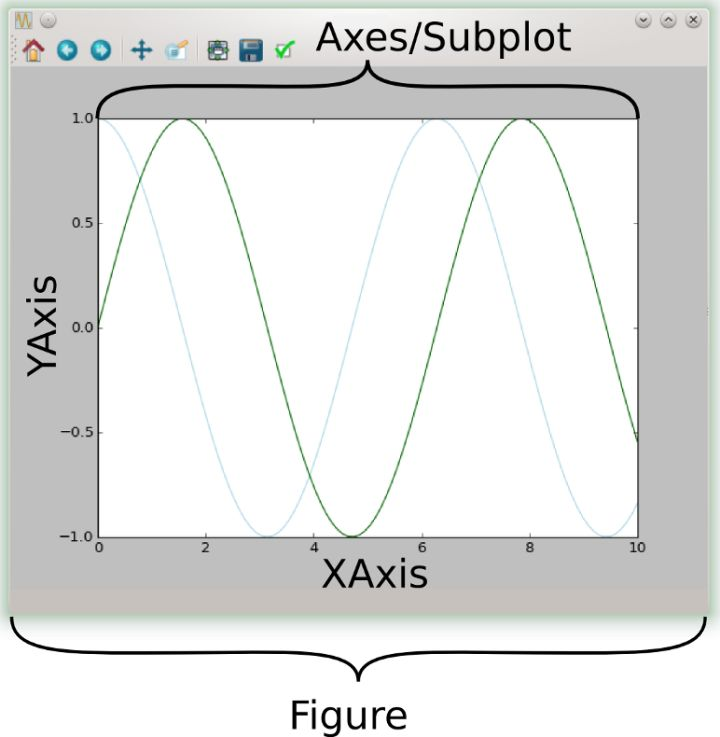

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

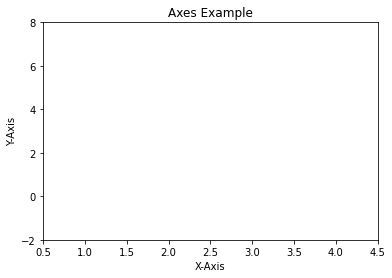

In [16]:
# 获取当前画板
fig = plt.figure()

# 在画板上固定画纸
ax = fig.add_subplot(111)

# 在画纸上绘画
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='Axes Example', ylabel='Y-Axis', xlabel='X-Axis')

# 展示整个画板
plt.show()

# Axes 和 Subplot 的区别

<class 'matplotlib.axes._subplots.AxesSubplot'>


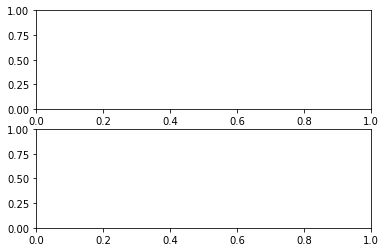

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
print(type(ax1))

plt.show()

<class 'matplotlib.axes._axes.Axes'>


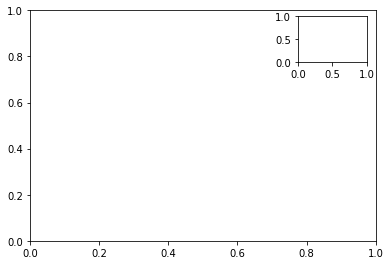

In [18]:
fig = plt.figure()
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax4 = fig.add_axes([0.72, 0.72, 0.16, 0.16])
print(type(ax3))

plt.show()

> 轴域（Axes）的感念确实可以先理解成一些轴（Axis）的集合，当然这个集合还有很多轴（Axis）的属性，标注等等。用add_axes()方法生成一个轴域（Axes），当生成了轴域后，从结果上看确实是生成了一个可以画图的子图。可以分别在不同轴域（Axes）中画图。

## 总结：

+ 两种对象确实是“你中有我，我中有你”的关系，生成子图（subplot）的时候，必然带着所谓的一套轴域（Axes）。而用轴域（Axes）方法，客观上就是生成了一个可以画图的子图

+ add_subplot()方法在生成子图过程，简单明了，而用add_axes()方法,则生成子图的灵活性更强，完全可以实现add_subplot()方法的功能，可以控制子图显示位置，甚至实现相互重叠的效果

+ add_subplot()可以看作是add_axes()的特例

# Axes方法 & pyplot函数

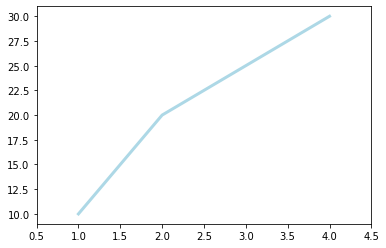

In [19]:
# pyplot 函数示例 （函数式编程）

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.xlim(0.5, 4.5)
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


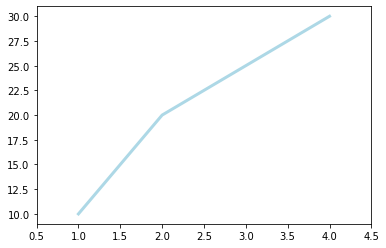

In [20]:
# Axes 方法示例 （对象式编程）

fig = plt.figure()
ax = fig.add_subplot(111)
print(type(ax))
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.set_xlim(0.5, 4.5)
plt.show()

## 总结：

> 建议按照显式的方法去绘图：先创建画布，再创建坐标轴，最后在坐标轴上绘图。这种代码方式会让绘图逻辑更加清晰，能够随心所欲的修改图片的每个地方。

# 绘图方法

## 图片尺寸大小

> 在创建 Figure 对象的时候，我们可以使用 figsize 和 dpi 控制图片尺寸

```python
# 创建一张 1600 x 800 像素的画布
fig = plt.figure(figsize=(16, 8), dpi=100)
```
> `figsize`表示画布长宽大小，单位为英寸；`dpi`表示每英寸的像素值

## 基于 axes 绘图

<function matplotlib.pyplot.show(*args, **kw)>

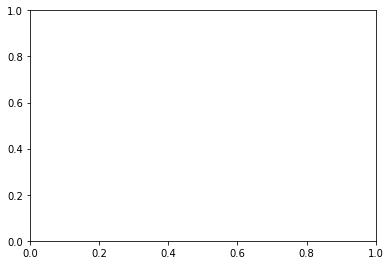

In [21]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])      #  [距离左边，下边，坐标轴宽度，坐标轴高度] 范围(0, 1)
plt.show

> [0.1, 0.1, 0.8, 0.8] 表示的是在画布中，坐标轴距离画布左边0.1倍的位置，距离下边0.1倍的位置，确定了这两个位置后，坐标轴的整体宽度和高度占0.8倍的大小，换句话说，距离右边和上边0.9（0.1+0.8）倍

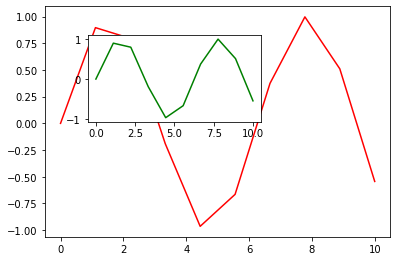

In [22]:
x = np.linspace(0, 10, 10)
y = np.sin(x)

# 创建画布
fig = plt.figure()

# 创建坐标轴
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# 在坐标轴上绘图
ax1.plot(x, y, 'r')
ax2.plot(x, y, 'g')

plt.show()

## 基于 subplot 绘图

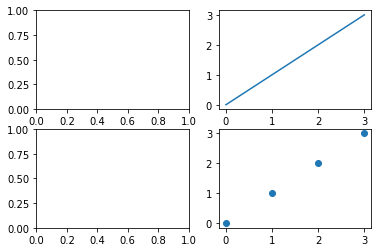

In [23]:
# 通过subplots方法得到画布fig和一个包含所有字坐标轴的数组axes
fig, axes = plt.subplots(2, 2)

# 使用切片方法能够获得里面的每个子坐标轴
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]

# 在ax2坐标轴绘制了直线图
ax2.plot(np.arange(4))

# plt方法默认是在最后一个建立的坐标轴上绘图
plt.scatter(np.arange(4), np.arange(4))

plt.show()

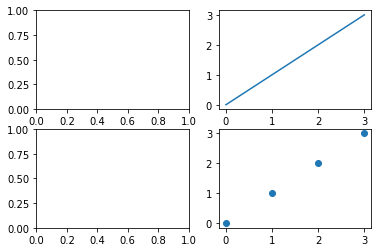

In [24]:
fig, axes = plt.subplots(2, 2)
ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]

plt.scatter(np.arange(4), np.arange(4))    # plt方法默认是在最后一个建立的坐标轴上绘图
ax4 = axes[1, 1]

ax2.plot(np.arange(4))

plt.show()

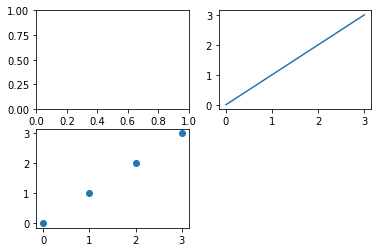

In [26]:
# 通过subplot方法逐一添加子坐标轴并完成绘图

ax1 = plt.subplot(2, 2, 1)

ax2 = plt.subplot(2, 2, 2)
plt.plot(np.arange(4))        # 这种方式就跟plt方法的顺序有关系了，plt在对应的子坐标轴下完成绘图

ax3 = plt.subplot(2, 2, 3)
plt.scatter(np.arange(4), np.arange(4))

# ax4 = plt.subplot(2, 2, 4)
plt.show()

## 基于 subplots 绘图

> 使用subplots方法能够直接创建画布`fig`和包含所有坐标轴的数组`axes`
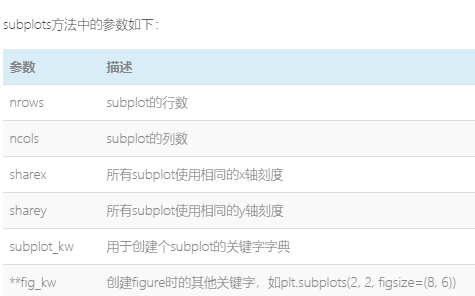

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85f11fb278>,
      dtype=object)

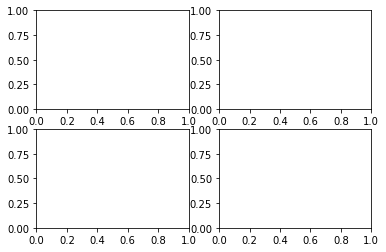

In [78]:
fig, axes = plt.subplots(2, 2)
axes

In [79]:
# 获取每个坐标轴

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]

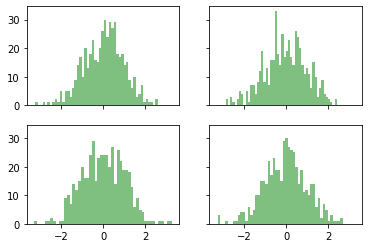

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)
plt.show()

# 绘图元素

## 标题

```python
# 推荐使用坐标轴实例的 set_title 方法来创建标题
ax.set_title('标题')
```

## 轴标

```python
# set_xlabel 和 set_ylabel 方法能够分别创建 x轴和 y轴的标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
```

## 图例

> 创建图例的方法有两种

> + 直接调用 legend 方法，并传入图例的值
    ```python
    ax.legend(['legend1', 'legend2', 'legend3'])
    ```
    
> + 在绘图的时候就传入 label 参数
    ```python
    ax.plot(x, y, label='legend1')
    ax.plot(x, y, label='legend2')
    ax.legend()
    ```
    
> legend 方法有一个 loc 参数，可以指定图例放在图中的什么位置：
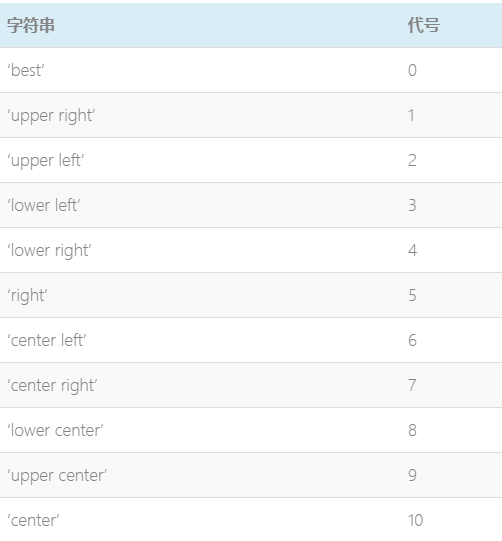

> 可以使用字符串或者相对应的代号   
```python
ax.legend(loc='best')
ax.legend(loc=0)
```

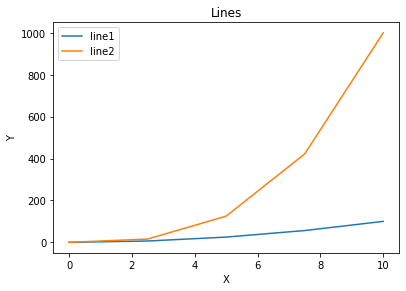

In [27]:
x = np.linspace(0, 10, 5)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, x**2, label='line1')
ax.plot(x, x**3, label='line2')
ax.set_title('Lines')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')
plt.show()

## 颜色

> matplotlib中颜色的定义直接使用 color 参数；可以使用颜色的名字或者RGB值（例如： '#1155dd' ）
```python
ax.plot(x, y, color='r')
ax.plot(x, y, color='#1155dd')
```

## 线型

> + 通过 linestyle 或者 ls 参数控制线的类型；
> + 通过 linewidth 或者 lw 参数控制线的宽度

```python
ax.plot(x, y, ls=':', lw=1.5)
```

## 透明度

> 通过 alpha 参数控制透明度，范围在(0, 1)之间

```python
ax.plot(x, y, alpha=0.5)
```

## 标记

> 通过 marker 参数改变点的标记类型

```python
ax.plot(x, y, marker='+')
```

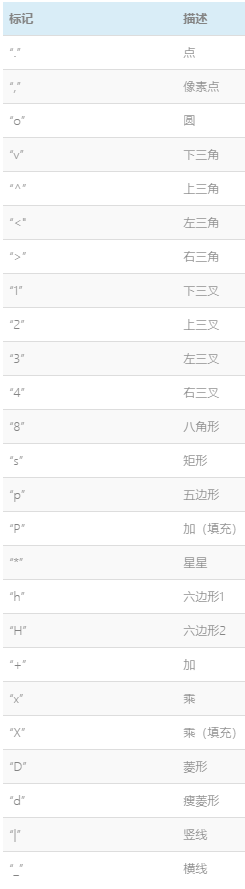

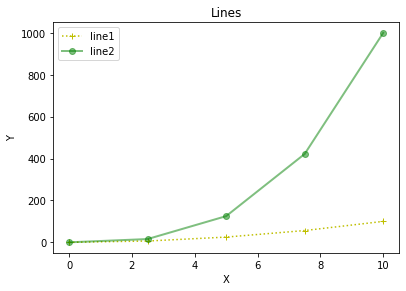

In [28]:
x = np.linspace(0, 10, 5)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, x**2, label='line1', color='y', ls=':', lw=1.5, marker='+')
ax.plot(x, x**3, label='line2', color='g', ls='-', lw=2.0, marker='o', alpha=0.5)
ax.set_title('Lines')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='best')
plt.show()

## 坐标轴刻度范围

> 通过坐标轴实例方法 set_xlim 或者 set_ylim 限制坐标轴的范围
```python
ax.set_xlim([min, max])
ax.set_ylim([min, max])
```

> 或者使用 axis('tight') 自动调整到比较紧凑的范围
```python
ax.axis('tight')
```

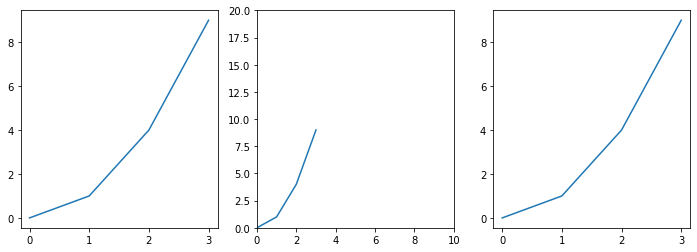

In [38]:
x = np.array([0, 1, 2, 3])

# 创建1行3列的子坐标轴（也就是三幅子图），默认会自动添加画布，返回当前的画布 fig 和该画布中包含所有坐标轴的数组
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(x, x**2)

ax[1].plot(x, x**2)
ax[1].set_xlim([0, 10])    # 接收一个list
ax[1].set_ylim(0, 20)      # 接收两个量值

ax[2].plot(x, x**2)
ax[2].axis('tight')

plt.show()

## 坐标轴对数刻度范围

> 通过 set_xscale 和 set_yscale 方法能够设定刻度，传入 'log' 能够设定对数刻度

```python
ax.set_xscale('log')
ax.set_yscale('log')
```

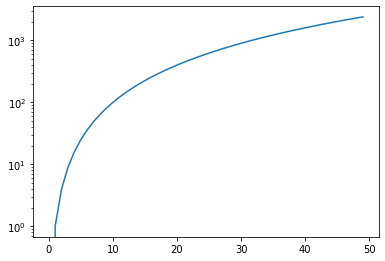

In [39]:
x = np.arange(50)

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(x, x**2)
ax.set_yscale('log')

plt.show()

## 坐标轴字符串

> + 通过 set_xticks 和 set_yticks 方法能够自定义设置要显示的坐标轴刻度，
> + 通过 set_xticklabels 和 set_yticklabels 方法能够在坐标轴刻度加上符号显示

```python
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
```

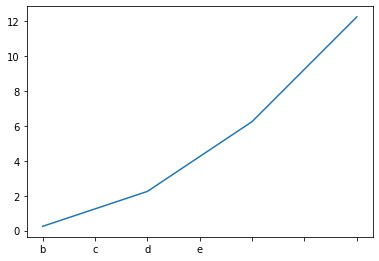

In [43]:
x = np.array([0.5, 1.5, 2.5, 3.5])

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(x, x**2)
# ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

plt.show()

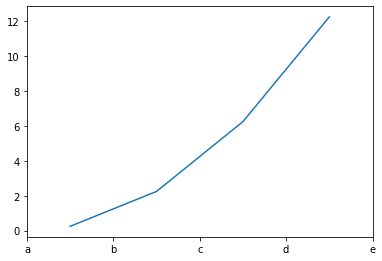

In [45]:
x = np.array([0.5, 1.5, 2.5, 3.5])

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(x, x**2)

# 使用刻度符号 ['a', 'b', 'c', 'd', 'e'] 会替换刻度值 [0, 1, 2, 3, 4]
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

plt.show()

## 坐标轴刻度与坐标轴标签间距

> 通过坐标轴实例的 xaxis.labelpad 和 yaxis.labelpad 方法能够调节坐标轴刻度与坐标轴标签的间距

```python
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5
```

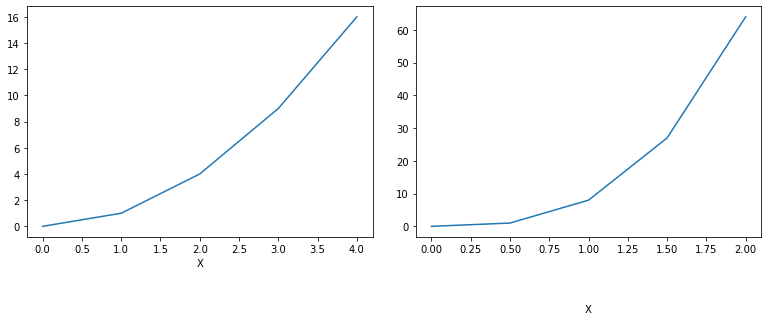

In [69]:
x = np.arange(5)

fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([1.0, 0.1, 0.8, 0.8])

ax1.plot(x, x**2)
ax1.set_xlabel('X')

ax2.plot(x/2, x**3)
ax2.set_xlabel('X')
ax2.xaxis.labelpad = 50

plt.show()

## 调整坐标轴位置

> 当使用 plt.subplots 方法创建的坐标轴，可以使用 `subplots_adjust` 方法调整坐标轴的位置

```python
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.8)
```

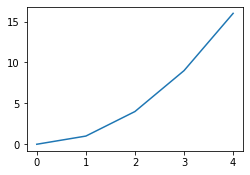

In [70]:
x = np.arange(5)

fig, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
fig.subplots_adjust(left=0.1, right=0.6, bottom=0.1, top=0.6)

plt.show()

> 在 jupyter-notebook 中显示不明显，在命令行中可以观察出效果：

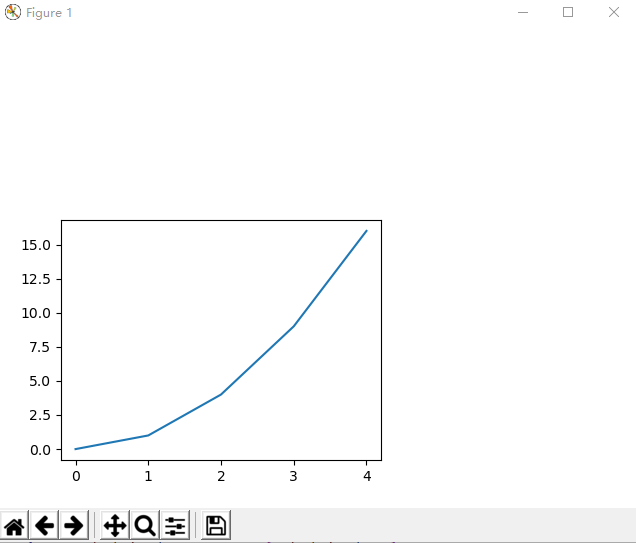

## 网格

> 通过 grid 方法在图中加入网格线

```python
ax.grid(color='r', ls='dashed', lw=0.5, alpha=0.8)
```

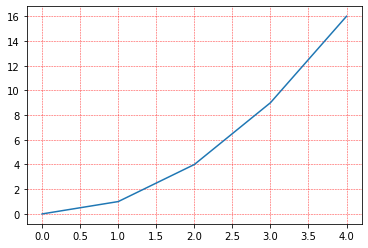

In [72]:
x = np.arange(5)

fig, ax = plt.subplots(1, 1)
ax.plot(x, x**2)
ax.grid(color='r', ls='dashed', lw=0.5, alpha=0.8)

plt.show()

## 轴属性

> 通过轴实例的 spines 方法，能够控制上下左右四个坐标轴的属性。比如可以设置颜色，线宽等

```python
ax.spines['top'].set_color('red')
ax.spines['bottom'].set_linewidth('1.5')
ax.spines['right'].set_color('none')                 # 隐藏坐标轴
ax.yaxis.tick_left()                                 # 只在y轴左边设置刻度
```

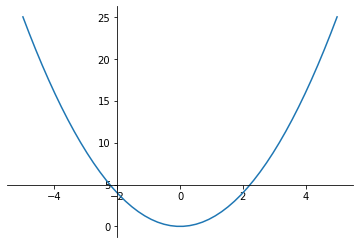

In [76]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# 删除上、右坐标轴
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 5))   # 与x轴交叉的y轴刻度为 5

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', -2))   # 与y轴交叉的x轴刻度为 -2

x = np.linspace(-5, 5, 50)
ax.plot(x, x**2)

plt.show()

## 双坐标轴

> 通过 twinx 和 twiny 可以设置双坐标轴

```python
ax1.plot()
ax2 = ax1.twinx()             # 共用 x轴，双 y轴
```

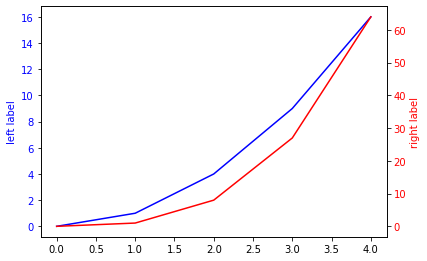

In [77]:
x = np.arange(5)

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x, x**2, color='b')
ax1.set_ylabel('left label', color='blue')

ax2 = ax1.twinx()
ax2.plot(x, x**3, color='r')
ax2.set_ylabel('right label', color='red')

# 设置轴标签颜色
for i in ax1.get_yticklabels():
    i.set_color('blue')
    
for j in ax2.get_yticklabels():
    j.set_color('red')
    
plt.show()

## 全局字体

```python
from matplotlib import rcParams
rcParams.update({'font.size': 18, 'font.family': 'serif'})
```

## 添加文字

> matplotlib 支持 LaTeX 表达式

```python
ax.text(x=0.15, y=0.2, s=r"$y=x^2$", fontsize=20, color='blue')
        
plt.text(x=0.15, y=0.2, s=r"$y=x^2$", fontsize=20, color='blue')     
```

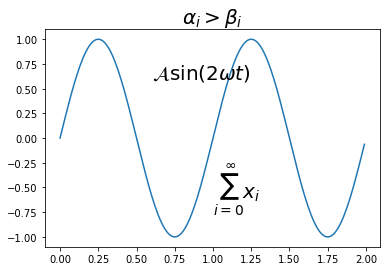

In [84]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

plt.plot(t, s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$', fontsize=20)
plt.show()